# Capítulo 6: Árbol de Decisión

## <span style="color:green">1. Clasificación</span>

In [2]:
#Importar los bibliotecas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [3]:
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
#Complementos con la dirección especifica de la base de datos que queremos.
COMEDIANTES = "Capitulo_6/Comediantes.csv"
#Declara la función para extraer datos
def extraer_datos(root,database):
    csv_path=root+ database
    return pd.read_csv(csv_path)

In [4]:
#Checa los datos y extrae el dataframe 
#Chica, mucho ojo con las variables. Escribirlas en mayúsculas como arriba. 
df=extraer_datos(DOWNLOAD_ROOT,COMEDIANTES)
#Es un dataframe chiquito pero útil :) 
df
#Recuerda que Go es el veredicto de si será o no será comediante

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [5]:
#Utiliza el label_encoder para asignar un valor numérico a Nacionalidad y a Go
from sklearn.preprocessing import LabelEncoder

def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

variables = ["Nationality","Go"]

for l in variables:
    label_encoder(l)
#verifica que las variables "Nacionality" y "Go" se cambiaron a valores numéricos 
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,1,0
1,42,12,4,2,0
2,23,4,6,0,0
3,52,4,4,2,0
4,43,21,8,2,1
5,44,14,5,1,0
6,66,3,7,0,1
7,35,14,9,1,1
8,52,13,7,0,1
9,35,5,9,0,1


In [6]:
#Separa en dos partes el dataframe 
y = df["Go"]
x = df.drop("Go",axis=1)

In [7]:
#verifica que se haya hecho la separación 
x
y

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64

In [8]:
#Carnita del asunto:Haz el clasificador de DecisionTree
    #Importa la función
from sklearn.tree import DecisionTreeClassifier
    #Haz el objeto 
arbol = DecisionTreeClassifier()
    #Haz el ajuste
arbol.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'Age <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

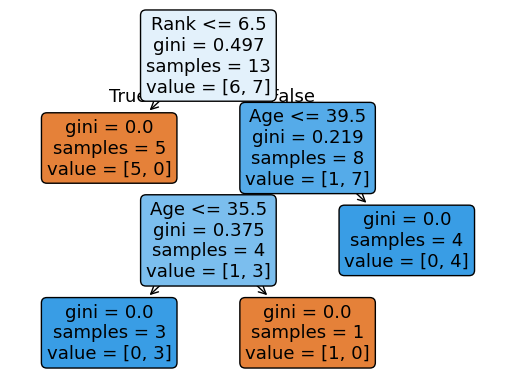

In [9]:
#Gráfica el árbol de decisión 
from sklearn import tree
tree.plot_tree(arbol,feature_names=x.columns,rounded=True,filled=True)

***

## <span style="color:green">2. Probabilidades</span>

También permite estimar probabilidades. Lo veremos con un ejemplo:

In [10]:
#Selecciona una persona aleatoria para estimar su probabilidad y juega con las variables 
arbol.predict_proba([[40,6,7,1]])

C:\Users\Jaime\anaconda3\envs\tf310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

-El orden de las variables esta como: **Edad, experiencia, rango y nacionalidad**

El resultado esta como : lado izquierdo= No comediante - lado derecho=Comediante

---

## <span style="color:green">3. Regresión</span>

Los árboles de decisión tambien pueden hacer regresiones lineales.

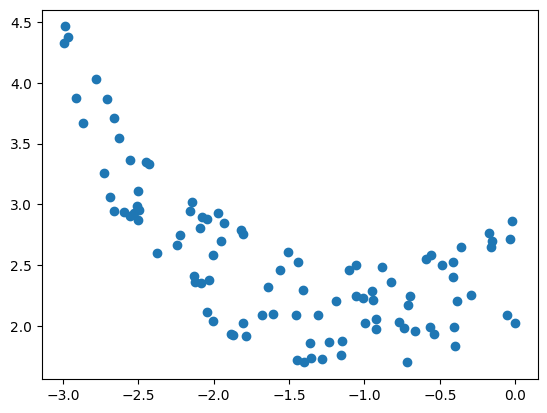

In [11]:
#Genera 100 número aleatorios y añade un poco de aleatoriedad 
m = 100
x = 3 * np.random.rand(m,1) - 3
y = 2 + x + 0.5*x**2 + np.random.rand(m,1)
#np.c_[([x])]
plt.scatter(x,y)

In [12]:
#Crea un  árbol de decisión con un hiperparametro de 2
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor(max_depth=2)
arbol.fit(x,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.5, 0.8333333333333334, 'x[0] <= -2.402\nsquared_error = 0.379\nsamples = 100\nvalue = 2.558'),
 Text(0.25, 0.5, 'x[0] <= -2.755\nsquared_error = 0.258\nsamples = 22\nvalue = 3.449'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.083\nsamples = 6\nvalue = 4.123'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.089\nsamples = 16\nvalue = 3.196'),
 Text(0.75, 0.5, 'x[0] <= -1.908\nsquared_error = 0.127\nsamples = 78\nvalue = 2.307'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.081\nsamples = 18\nvalue = 2.627'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.1\nsamples = 60\nvalue = 2.211')]

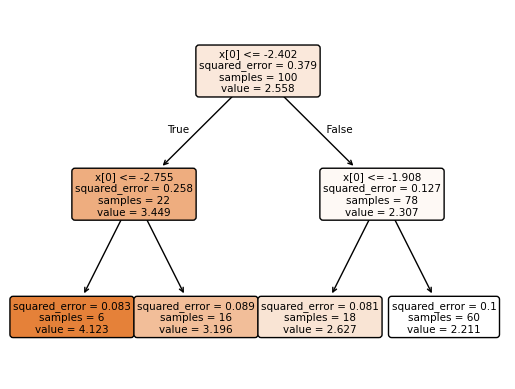

In [13]:
#Dale formato a tu arbolito bebé
tree.plot_tree(arbol,rounded=True,filled=True)

Recuerda que pusimos una profundidad máxima de 2, esto lo decides tu con base a tus objetivos.

KEY: **mse**= Mean Square Error es equivalente al GINI. Te indica el nivel de impureza. **nsamples=** Cantidad de muestras por nodo. **nvalue=** Valor

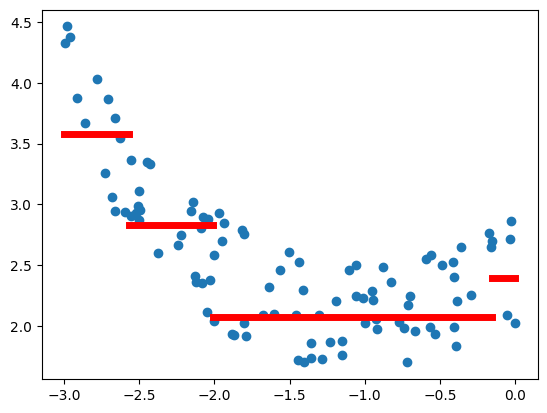

In [14]:
#Hacer gráfica toda complicada :(
x1 = np.linspace(-3,-2.568)
y1 = np.linspace(3.5818,3.5818)
x2 = np.linspace(-2.569,-2.008)
y2 = np.linspace(2.834,2.834)
x3 = np.linspace(-2.009,-0.151)
y3 = np.linspace(2.075,2.075)
x4 = np.linspace(-0.152,0)
y4 = np.linspace(2.392,2.392)
plt.scatter(x,y)
plt.plot(x1,y1,"r-",linewidth=5)
plt.plot(x2,y2,"r-",linewidth=5)
plt.plot(x3,y3,"r-",linewidth=5)
plt.plot(x4,y4,"r-",linewidth=5)

Los nodos se ven representados por cada linea rojo

[Text(0.5, 0.875, 'x[0] <= -2.402\nsquared_error = 0.379\nsamples = 100\nvalue = 2.558'),
 Text(0.25, 0.625, 'x[0] <= -2.755\nsquared_error = 0.258\nsamples = 22\nvalue = 3.449'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= -2.939\nsquared_error = 0.083\nsamples = 6\nvalue = 4.123'),
 Text(0.0625, 0.125, 'squared_error = 0.003\nsamples = 3\nvalue = 4.389'),
 Text(0.1875, 0.125, 'squared_error = 0.022\nsamples = 3\nvalue = 3.858'),
 Text(0.375, 0.375, 'x[0] <= -2.611\nsquared_error = 0.089\nsamples = 16\nvalue = 3.196'),
 Text(0.3125, 0.125, 'squared_error = 0.112\nsamples = 6\nvalue = 3.398'),
 Text(0.4375, 0.125, 'squared_error = 0.036\nsamples = 10\nvalue = 3.075'),
 Text(0.75, 0.625, 'x[0] <= -1.908\nsquared_error = 0.127\nsamples = 78\nvalue = 2.307'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= -2.137\nsquared_error = 0.081\nsamples = 18\nvalue = 2.627'),
 Text(0.5625, 0.125, 'squared_error = 0.026\nsamples = 5\nvalue = 2.798'),
 Text(0.6875, 0.125, 

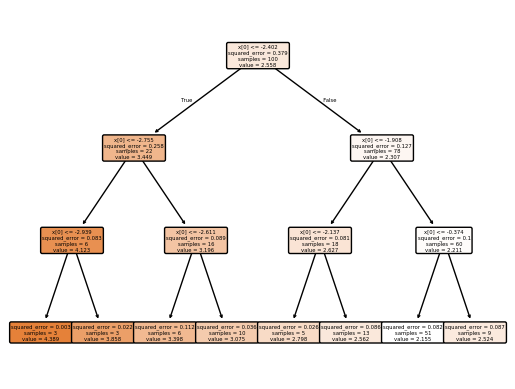

In [15]:
#Arreglar el sobreajuste poniendo una profundidad máxima mayor a la anterior. Ej: 3. 
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor(max_depth=3)
arbol.fit(x,y)
#Gráficalo 
tree.plot_tree(arbol,rounded=True,filled=True)
#tree.plot_tree(arbol,rounded=True,filled=True,fontsize=15)Para hacer más grande la letra ajustar fontsize

In [16]:
#Haz un árbol de decisiones sin restricciones
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor()
arbol.fit(x,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.3188416527920082, 0.9666666666666667, 'x[0] <= -2.402\nsquared_error = 0.379\nsamples = 100\nvalue = 2.558'),
 Text(0.1019467213114754, 0.9, 'x[0] <= -2.755\nsquared_error = 0.258\nsamples = 22\nvalue = 3.449'),
 Text(0.21039418705174182, 0.9333333333333333, 'True  '),
 Text(0.040983606557377046, 0.8333333333333334, 'x[0] <= -2.939\nsquared_error = 0.083\nsamples = 6\nvalue = 4.123'),
 Text(0.01639344262295082, 0.7666666666666667, 'x[0] <= -2.987\nsquared_error = 0.003\nsamples = 3\nvalue = 4.389'),
 Text(0.00819672131147541, 0.7, 'squared_error = 0.0\nsamples = 1\nvalue = 4.324'),
 Text(0.02459016393442623, 0.7, 'x[0] <= -2.973\nsquared_error = 0.002\nsamples = 2\nvalue = 4.421'),
 Text(0.01639344262295082, 0.6333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 4.462'),
 Text(0.03278688524590164, 0.6333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 4.38'),
 Text(0.06557377049180328, 0.7666666666666667, 'x[0] <= -2.823\nsquared_error = 0.022\nsamples = 3\nvalu

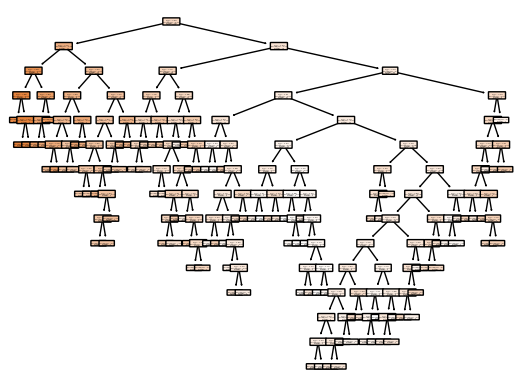

In [17]:
#Gráficalo y asómbrate 
tree.plot_tree(arbol,rounded=True,filled=True)